# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

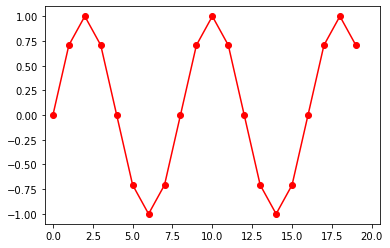

In [2]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

### 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
#### (대각선 위의 성분들이 같은 정사각 행렬)

In [3]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :5]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         1.22464680e-16, -7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16,
        -7.07106781e-01, -1.00000000e+00],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01,
        -1.00000000e+00, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01, -2.44929360e-16]])

In [4]:
X_train = S[:-1, :5][:, :, np.newaxis]
Y_train = S[:-1, 5]
X_train.shape, Y_train.shape

((18, 5, 1), (18,))

In [5]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01]]])

In [6]:
Y_train[:4]

array([-7.07106781e-01, -1.00000000e+00, -7.07106781e-01, -2.44929360e-16])

ValueError: x and y must have same first dimension, but have shapes (3,) and (5,)

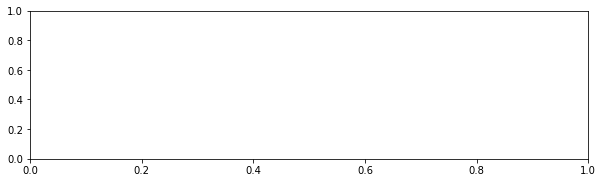

In [7]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

### RNN으로 해결 - SimpleRNN() 사용

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

In [ ]:
model2 = Sequential()
model2.add(SimpleRNN(10, input_shape=(5, 1))) # input은 3개 output은 1개 
model2.add(Dense(1, activation="linear"))
model2.summary() #파라미터의 개수가 120? -> 

In [ ]:
model2.compile(loss='mse', optimizer='sgd')

In [ ]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model2.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [ ]:
history = model2.fit(X_train, Y_train, epochs=100) 
# 분류 모델이 아니기 때문에 정확도 Accuarcy가 없다!!!!!!!!!!


### 결과 확인

In [ ]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show() 

In [ ]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show() 

In [ ]:
# 입력에 대한 weights
model.weights[0]

In [ ]:
# 유닛에 대한 weights
model.weights[1]

In [ ]:
# bias
model.weights[2]